# **BOOTCAMP DATA SCIENCE APLICADA - PROJETO MODULO 1**

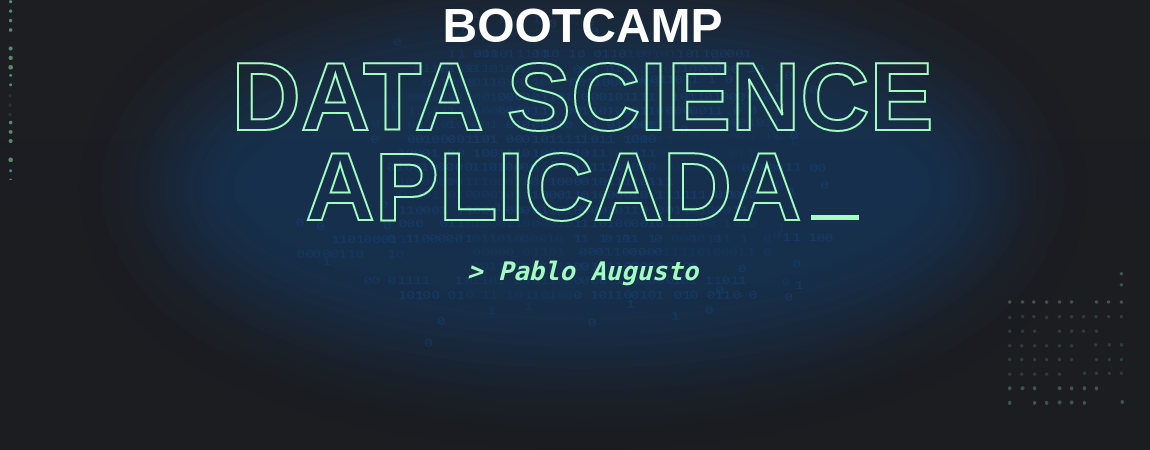

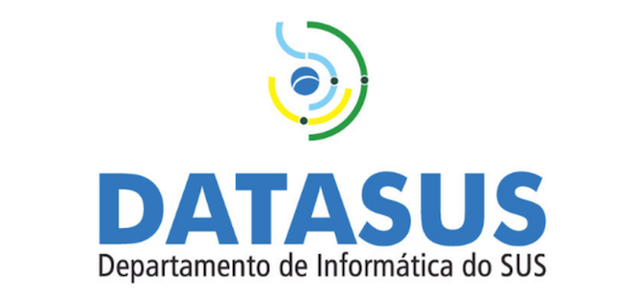

#Introdução

###No Brasil, a violência representa a terceira causa geral de óbitos - a primeira entre adolescentes e adultos - e provoca graves prejuízos sociais, familiares, pessoais e econômicos.


###A **violência interpessoal**, subdividida em violência comunitária e violência familiar, que inclui a violência infligida pelo parceiro íntimo, o abuso infantil e abuso contra os idosos. Na violência comunitária incluem-se a violência juvenil, os atos aleatórios de violência, o **estupro** e o ataque sexual por estranhos, bem como a violência em grupos institucionais, como escolas, locais de trabalho, prisões e asilos.




### Esse notebook contêm uma breve análise voltada ao **estupro** - *violência interpessoal listada na base de dados do* **DATASUS**.

#Importando bibliotecas

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#Leitura e tratamento dos datasets

***Freqüência por Ano da Notific segundo Estupro***

In [19]:
url = 'https://raw.githubusercontent.com/pabloaugmat/projeto01_bootcamp_datascience/main/Freq%C3%BC%C3%AAncia%20por%20Ano%20da%20Notific%20segundo%20Estupro.csv'
df_notif_estupros = pd.read_csv(url, encoding='ISO-8859-1', engine='python', sep=';', skiprows=4, skipfooter=13, thousands='.')
df_notif_estupros


,Estupro,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Sim,4066,8508,12087,16104,19129,20085,20392,22648,27038,30992,34435,215484


In [20]:
df_notif_estupros.drop(columns='Total', inplace=True)


In [21]:
df_notif_estupros.set_index('Estupro', inplace=True)

***Freqüência por Sexo segundo Estupro***

In [22]:
url = 'https://raw.githubusercontent.com/pabloaugmat/projeto01_bootcamp_datascience/main/Freq%C3%BC%C3%AAncia%20por%20Sexo%20segundo%20Estupro.csv'
df_genero = pd.read_csv(url, encoding='ISO-8859-1',engine='python',sep=';', skiprows=3,skipfooter=16, thousands='.')
df_genero

,Estupro,Ignorado,Masculino,Feminino,Total
0,Sim,18,23480,191986,215484


In [23]:
df_genero.drop(columns='Total', inplace=True)

In [24]:
df_genero.set_index('Estupro', inplace=True)

**Freqüência por Estupro e Faixa Etária**

In [25]:
url= 'https://raw.githubusercontent.com/pabloaugmat/projeto01_bootcamp_datascience/main/Freq%C3%BC%C3%AAncia%20por%20Estupro%20e%20Faixa%20Et%C3%A1ria.csv'
df_faixa_etaria = pd.read_csv(url, encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=16, thousands='.', engine='python')
df_faixa_etaria

,Estupro,Ign/Branco,<1 Ano,1-4,5-9,10-14,15-19,20-29,30-39,40-49,50-59,60 e mais,Total
0,Sim,183,2319,20904,33073,67343,33794,28720,15714,8073,3297,2064,215484


In [26]:
df_faixa_etaria.drop(columns='Total', inplace=True)

In [27]:
df_faixa_etaria.set_index('Estupro', inplace=True)

#Plot de gráficos para análise


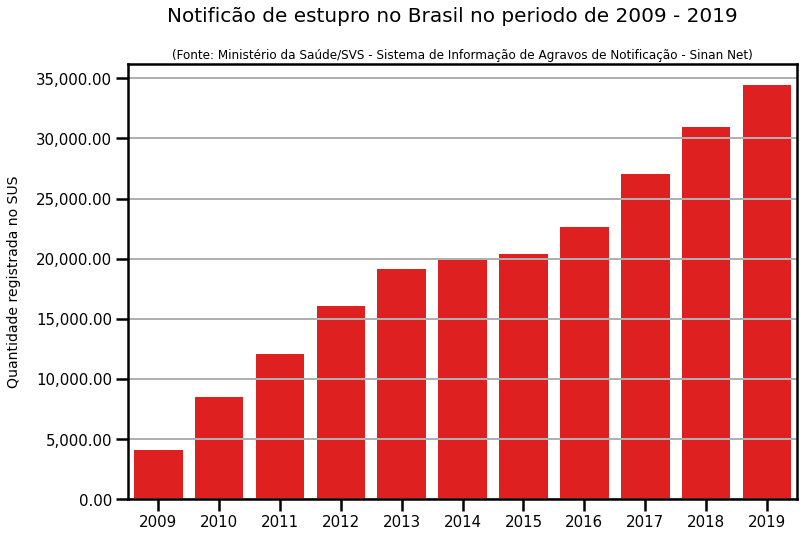

In [43]:

plt.figure(figsize=(12,8),facecolor='white')
ax = sns.barplot(data=df_notif_estupros,color='r')

plt.suptitle("Notificão de estupro no Brasil no periodo de {} - {}".format(df_notif_estupros.columns[0],df_notif_estupros.columns[-1]), fontsize=20)
plt.title('(Fonte: Ministério da Saúde/SVS - Sistema de Informação de Agravos de Notificação - Sinan Net)', fontsize=12)

plt.xticks(fontsize=15)
plt.yticks(fontsize = 15)

plt.grid(axis='y')

plt.ylabel('Quantidade registrada no SUS', fontsize = 14, labelpad = 15)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.show()

In [29]:
crescimento_percentual = float((df_notif_estupros[df_notif_estupros.columns[-1]]/df_notif_estupros[df_notif_estupros.columns[0]])*100-100)
crescimento_percentual

746.9011313330053

##Como podemos observar no gráfico acima, houve um aumento de **746.90%** nas notificações de estupro em um intervalo de 10 anos(2009-2019).


##No gráfico abaixo torna-se evidente que quase **90%** das vitimas são do sexo **feminino**.

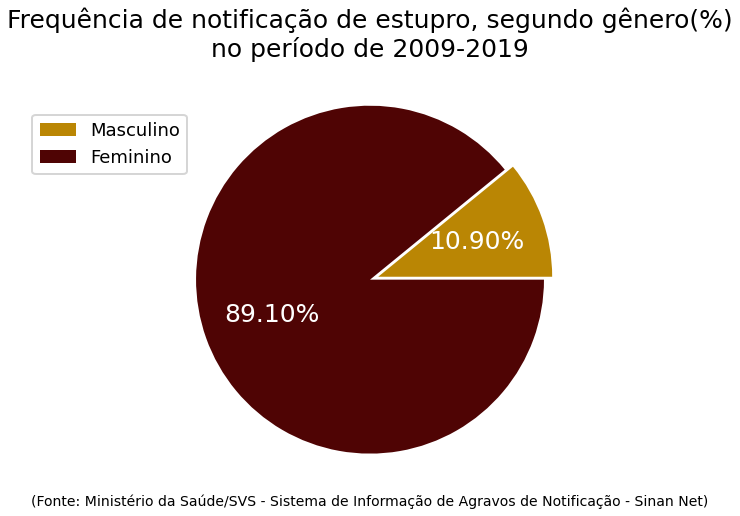

In [49]:
mustard = '#ba8604'
carmine = '#4f0404'
df_genero.T[1:].plot(kind='pie', subplots = True, figsize=(8,8), autopct='%.2f%%', fontsize=25, legend=True, colors=(mustard, carmine), explode=[0.05,0],textprops={'color':'W'})

plt.legend(bbox_to_anchor=(0.1,0.9), fontsize=18)

plt.ylabel('')

plt.title("Frequência de notificação de estupro, segundo gênero(%)\nno período de 2009-2019", fontsize= 25)

plt.text(x=-1.95,y=-1.3,s='(Fonte: Ministério da Saúde/SVS - Sistema de Informação de Agravos de Notificação - Sinan Net)',fontsize=14)

plt.show()

## Nos dois gráficos seguintes podemos observar que pelomenos **73.12%** das notificações de estupro no Brasil tem **CRIANÇAS e ADOLESCENTES** como vítimas.

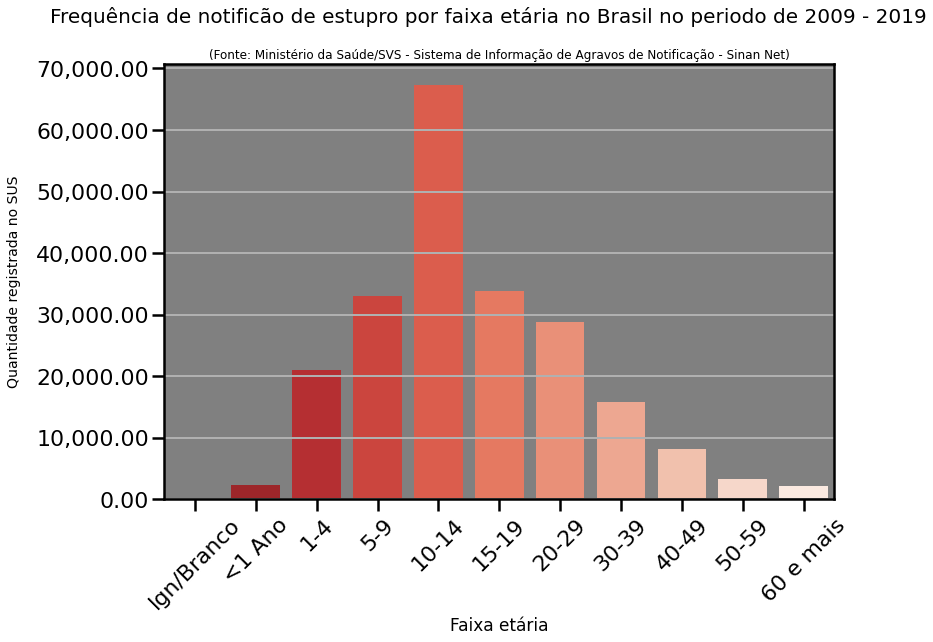

In [31]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_faixa_etaria,palette=('Reds_r'))

sns.set_context("poster")

plt.grid(axis='y')
ax.set_facecolor('grey')

plt.suptitle("Frequência de notificão de estupro por faixa etária no Brasil no periodo de {} - {}".format(df_notif_estupros.columns[0],df_notif_estupros.columns[-1]), fontsize=20)
plt.title('(Fonte: Ministério da Saúde/SVS - Sistema de Informação de Agravos de Notificação - Sinan Net)',fontsize=12)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylabel('Quantidade registrada no SUS', fontsize = 14, labelpad = 15)

plt.xticks(rotation=45)
plt.xlabel('Faixa etária',fontsize=17)

plt.show()

In [32]:
'''
Nesse bloco estou criando duas variaveis para separar crianças e adolescentes
dos adultos e idosos. (No fim eu somo as duas variaveis com o valor de 
[Ign/Branco] para conferir se o valor bate com o  total de casos de estupro)
'''

crian_adoles = df_faixa_etaria[df_faixa_etaria.columns[1:6]].values.sum()
adult_idoso = df_faixa_etaria[df_faixa_etaria.columns[6:]].values.sum()
crian_adoles+adult_idoso+df_faixa_etaria[df_faixa_etaria.columns[0]].values

array([215484])

In [33]:
faixa_etaria2 = {'Crianças e Adolescentes[0-19]':crian_adoles, 'Adultos e Idosos[20+]':adult_idoso}
df_faixa_etaria2 = pd.DataFrame.from_dict(faixa_etaria2, orient='index')

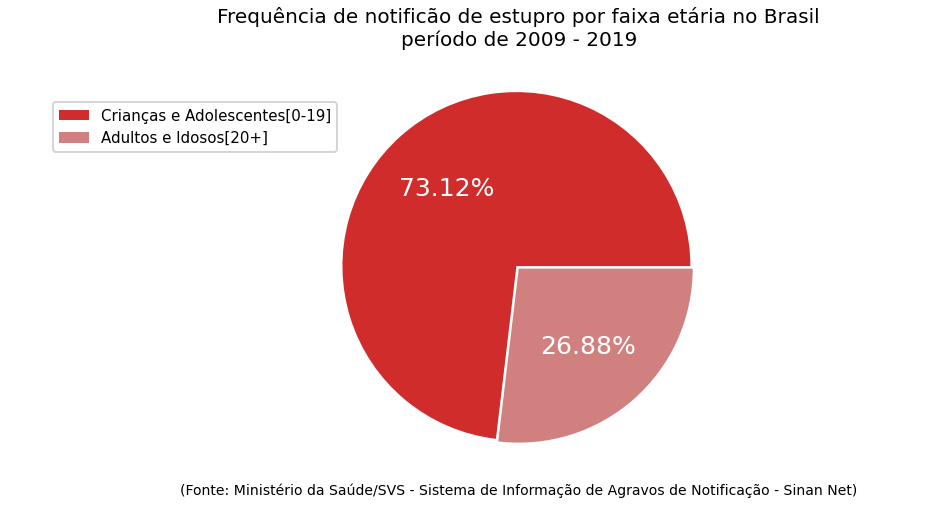

In [34]:
df_faixa_etaria2.plot(kind='pie', subplots = True, figsize=(8,8), autopct='%.2f%%', fontsize=25, legend=True, explode=[0.02,0],textprops={'color':'W'},colors=('#d12c2c','#d18080'))

plt.title("Frequência de notificão de estupro por faixa etária no Brasil\nperíodo de {} - {}".format(df_notif_estupros.columns[0],df_notif_estupros.columns[-1]), fontsize=20)
plt.text(x=-1.95,y=-1.3,s='(Fonte: Ministério da Saúde/SVS - Sistema de Informação de Agravos de Notificação - Sinan Net)',fontsize=14)

plt.legend(bbox_to_anchor=(0.1,0.9), fontsize=15)

plt.ylabel('')

plt.show()

#Sugestões para mais análises:

##Além das estatísticas abordadas, o **DATASUS** disponibiliza outras informações para análises mais profundas , tais como: ***Vínculo da vítima com o autor da violência, local de ocorrência, evolução do caso, dentre outras.***


# #LEI_DO_MINUTO_SEGUINTE

###Desde 2013, mulheres vítimas de violência sexual têm direito a atendimento emergencial, integral e gratuito em hospitais. Essa garantia é prevista na **“Lei do Minuto Seguinte”**.



###O Ministério Público Federal de São Paulo, por exemplo, fez campanhas para divulgar o que a lei assegura: como **amparo médico**, **psicológico e social**, **medidas de prevenção da gravidez e de doenças sexualmente transmissíveis.**Para ter atendimento, a palavra da vítima basta. O hospital deve informar sobre os serviços de saúde disponíveis para essas mulheres.

###No Brasil, **qualquer forma de atividade sexual não consentida é considerada violência sexual**. De acordo com o anuário brasileiro de segurança pública, em 2017, por exemplo, foram registrados cerca de **164 estupros por dia**. Os dados incluem apenas os casos que são denunciados.

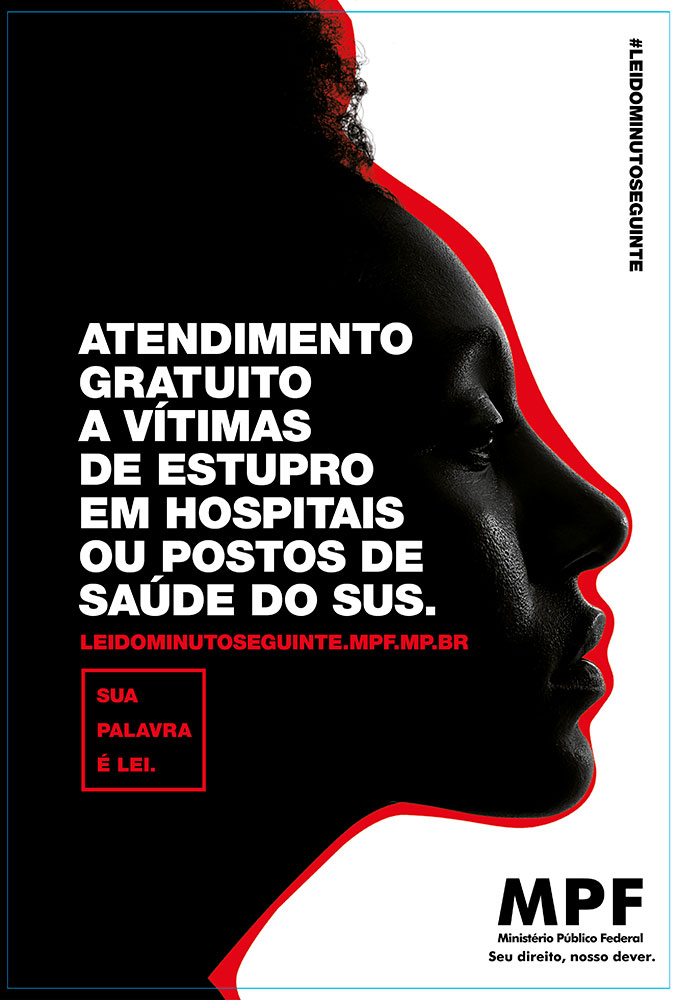

#Bibliografia


**[Documentação das bibliotecas para ciência de dados com python]**
*   https://matplotlib.org/
*   https://pandas.pydata.org/
*   https://seaborn.pydata.org/

**[Base de dados]**
*   http://www2.datasus.gov.br/DATASUS/index.php

**[Campanha contra estupro]**
*   https://leidominutoseguinte.mpf.mp.br/
*   https://www.futura.org.br/lei-do-minuto-seguinte-assegura-atendimento-medico-a-vitimas-de-violencia-sexual/


